### Micheal Jordon vs JK Rowling Classification
### Colab Link : https://colab.research.google.com/drive/1xAGXWlhx7ZrgHKgvS05arURF70BbhxXf?usp=sharing

In [1]:
"""
Keras Image Generator is used in this notebook.
The API requires the data to be in specific structure.
-data
 |-train
   |-- class1
   |-- class2
 |-test
   |-- class1
   |-- class2
"""
!mkdir "/content/data"
!mkdir "/content/data/train"
!mkdir "/content/data/test"
!mkdir "/content/data/train/mj"
!mkdir "/content/data/train/jk"
!mkdir "/content/data/test/mj"
!mkdir "/content/data/test/jk"

In [2]:
import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import shutil
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.models import Model
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Before running this cell images must be manually uploaded in the session storage

"""
This cell creates the test-train split and put the images in the respective directories. (Refer cell 1)
"""

src_dir = "/content/"
dest_dir_train_mj = "/content/data/train/mj/"
dest_dir_train_jk = "/content/data/train/jk/"
dest_dir_test_mj = "/content/data/test/mj/"
dest_dir_test_jk = "/content/data/test/jk/"

cnt1 = 0
cnt2 = 0

files = os.listdir(src_dir)
random.shuffle(files)

for count, filename in enumerate(files):
  if filename.find(".jpeg") != -1:
    src = src_dir + filename
    if filename.find("mj") != -1:
      if cnt1 > 29:
        # 10 images in test of this class
        des = dest_dir_test_mj + filename
      else:
        # 30 images in train of this class
        des = dest_dir_train_mj + filename
      cnt1 += 1
    else:
      if cnt2 > 29:
        # 10 images in test of this class
        des = dest_dir_test_jk + filename
      else:
        # 30 images in train of this class
        des = dest_dir_train_jk + filename
      cnt2 += 1
    dest = shutil.move(src, des)

In [4]:
datagen = ImageDataGenerator(rescale=1.0/255.0) # Normalising pixels to [0-1]

# Test and Train Generators with batch_size 10.
train_it = datagen.flow_from_directory('/content/data/train/',
	class_mode='binary', batch_size = 10, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/data/test/',
	class_mode='binary', batch_size = 10, target_size=(224, 224))

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
def VGG1():
  """
  Returns VGG1 model
  """
  model = Sequential()
  # One VGG Block
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D((2, 2)))

  # Two Dense Layers
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [6]:
def transfer_learning():
  """
  Returns VGG16 pretained + extra layers model
  """
  # Pre-trained VGG16
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  for layer in model.layers:
    layer.trainable = False

  # Two Dense Layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)

  model = Model(inputs=model.inputs, outputs=output)
  model.compile(optimizer = "adam", loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [7]:
def summarize_diagnostics(history):
  """
  Parameters :

  > history : Returned from model.fit(). History of loss and accuracy from model.fit() APU call.

  Plots loss vs epochs and accuracy vs epochs
  """
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()

Epoch 1/20
6/6 [==============================] - 7s 974ms/step - loss: 55.8173 - accuracy: 0.4417 - val_loss: 55.3986 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 5s 839ms/step - loss: 28.4066 - accuracy: 0.5745 - val_loss: 7.7825 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 5s 809ms/step - loss: 3.0027 - accuracy: 0.5967 - val_loss: 2.0558 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 5s 829ms/step - loss: 2.0905 - accuracy: 0.6717 - val_loss: 5.9610 - val_accuracy: 0.6000
Epoch 5/20
6/6 [==============================] - 5s 795ms/step - loss: 2.4738 - accuracy: 0.7417 - val_loss: 4.1304 - val_accuracy: 0.5500
Epoch 6/20
6/6 [==============================] - 5s 814ms/step - loss: 0.7425 - accuracy: 0.8481 - val_loss: 1.7776 - val_accuracy: 0.7000
Epoch 7/20
6/6 [==============================] - 5s 826ms/step - loss: 0.0385 - accuracy: 0.9840 - val_loss: 3.4707 - val_accuracy: 0.5500
Epoch 8/20
6/6 [=

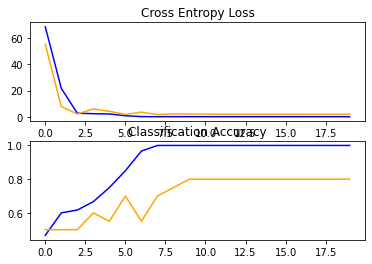

In [8]:
model = VGG1()
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20)
summarize_diagnostics(history)

Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/20
6/6 [==============================] - 7s 1s/step - loss: 54.8662 - accuracy: 0.3421 - val_loss: 46.3003 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 6s 898ms/step - loss: 41.1902 - accuracy: 0.5636 - val_loss: 10.0633 - val_accuracy: 0.5000
Epoch 3/20
6/6 [==============================] - 6s 900ms/step - loss: 26.5654 - accuracy: 0.3667 - val_loss: 10.7039 - val_accuracy: 0.5500
Epoch 4/20
6/6 [==============================] - 6s 912ms/step - loss: 8.4163 - accuracy: 0.6721 - val_loss: 6.9599 - val_accuracy: 0.6000
Epoch 5/20
6/6 [==============================] - 5s 871ms/step - loss: 9.7528 - accuracy: 0.6088 - val_loss: 3.1765 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 6s 867ms/step - loss: 3.1511 - accuracy: 0.7576 - val_loss: 5.6757 - val_accuracy: 0.7500
Epoch 7/20
6/6 [==============================] - 5s 894ms/step - loss: 4.151

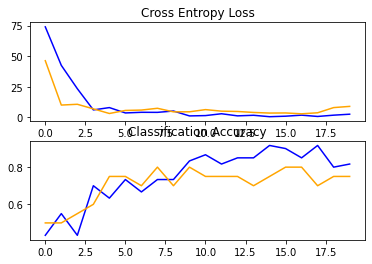

In [9]:
train_datagen1 = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen1 = ImageDataGenerator(rescale=1.0/255.0)
train_it1 = train_datagen1.flow_from_directory('/content/data/train/',class_mode='binary', batch_size = 10, target_size=(224, 224))
test_it1 = test_datagen1.flow_from_directory('/content/data/test/',class_mode='binary', batch_size = 10, target_size=(224, 224))
model = VGG1()
history = model.fit(train_it1, steps_per_epoch=len(train_it1),validation_data=test_it1, validation_steps=len(test_it1), epochs=20)
summarize_diagnostics(history)

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/20
6/6 [==============================] - 25s 4s/step - loss: 2.8538 - accuracy: 0.4690 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 24s 4s/step - loss: 0.5054 - accuracy: 0.7631 - val_loss: 0.5845 - val_accuracy: 0.6000
Epoch 3/20
6/6 [==============================] - 24s 4s/step - loss: 0.2958 - accuracy: 0.8821 - val_loss: 0.3728 - val_accuracy: 0.9000
Epoch 4/20
6/6 [==============================] - 24s 4s/step - loss: 0.1148 - accuracy: 1.0000 - val_loss: 0.2919 - val_accuracy: 0.9000
Epoch 5/20
6/6 [==============================] - 24s 4s/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.2572 - val_accuracy: 0.9500
Epoch 6/20
6/6 [==============================] - 24s 4s/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.2183 - val_accuracy: 0.9000
Epoch 7/20
6/6 [==============================] - 24s 4s/step - loss: 0.0058 - accuracy: 1.0000 - val_loss:

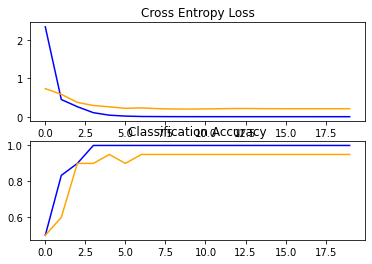

In [10]:
model = transfer_learning()
history = model.fit(train_it, steps_per_epoch=len(train_it),validation_data=test_it, validation_steps=len(test_it), epochs=20)
summarize_diagnostics(history)